In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("../data/miniterrain.csv")

In [3]:
df.head()

,bumpiness,grade,target
0,0.832143,0.980161,1.0
1,0.530852,0.934583,1.0
2,0.069974,0.502007,0.0
3,0.414885,0.056444,0.0
4,0.633748,0.897043,1.0


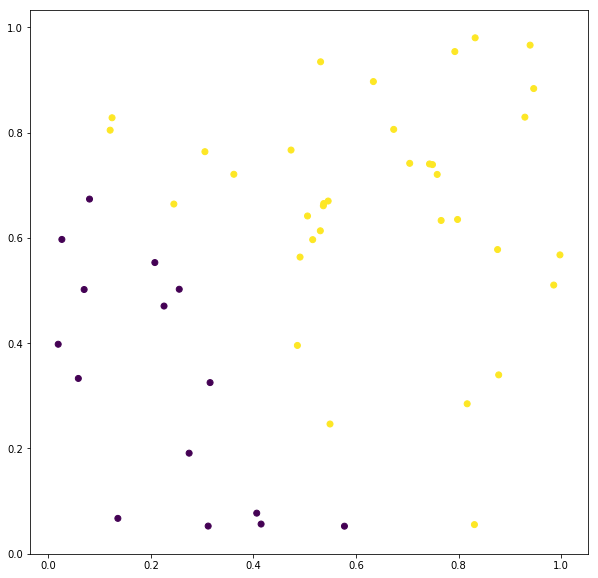

In [4]:
plt.figure(figsize=(10,10))
plt.scatter(df["bumpiness"],df["grade"],c=df["target"])
plt.show()

In [5]:
# We need to find a line that separates one class and the other. For example. this one:

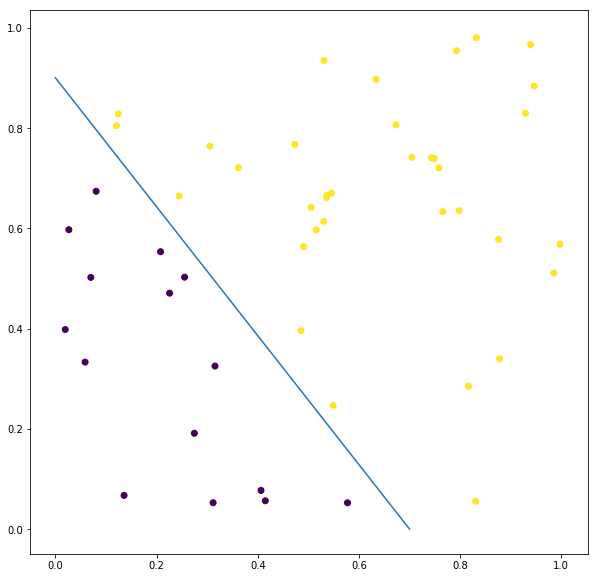

In [6]:
plt.figure(figsize=(10,10))
plt.scatter(df["bumpiness"],df["grade"],c=df["target"])
plt.plot([0,0.7],[0.9,0])
plt.show()

In [7]:
# But there are infinite lines that could cut the dataset in 2

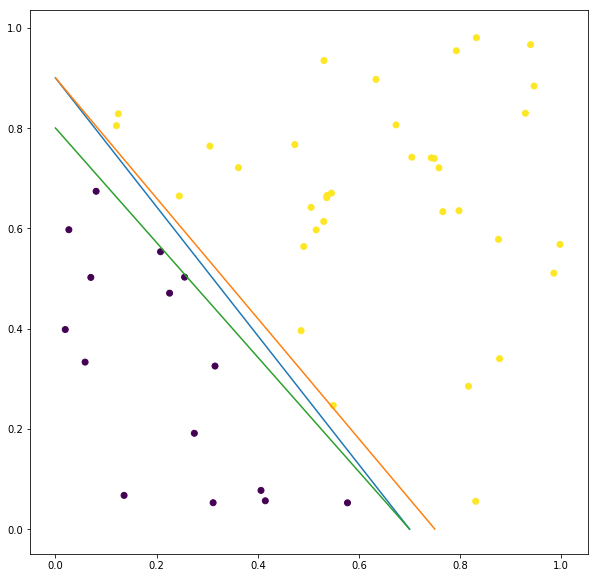

In [8]:
plt.figure(figsize=(10,10))
plt.scatter(df["bumpiness"],df["grade"],c=df["target"])
plt.plot([0,0.7],[0.9,0])
plt.plot([0,0.75],[0.9,0])
plt.plot([0,0.7],[0.8,0])
plt.show()

In [9]:
# We need to find the one which maximizes the margin to the separating line. Let's take the original line 
# and let's draw the margins for each point

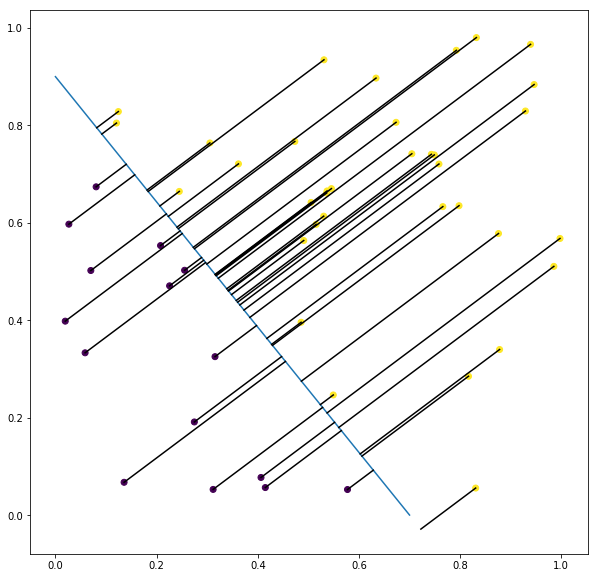

In [10]:
import math

x1=0.0
y1=0.9
x2=0.7
y2=0.0

plt.figure(figsize=(10,10))
plt.scatter(df["bumpiness"],df["grade"],c=df["target"])
plt.plot([0,0.7],[0.9,0])


for x3,y3 in df[["bumpiness","grade"]].values:
    # first convert line to normalized unit vector
    dx = x2 - x1
    dy = y2 - y1
    mag = math.sqrt(dx*dx + dy*dy)
    dx /= mag
    dy /= mag

    #translate the point and get the dot product
    l = (dx * (x3 - x1)) + (dy * (y3 - y1))
    x4 = (dx * l) + x1
    y4 = (dy * l) + y1
    
    plt.plot([x4,x3],[y4,y3],color="black" )
    
plt.show()

In [11]:
# But in reality, we see that only the points that are next to the separating line are the ones used to find 
# the line and the maximum margin

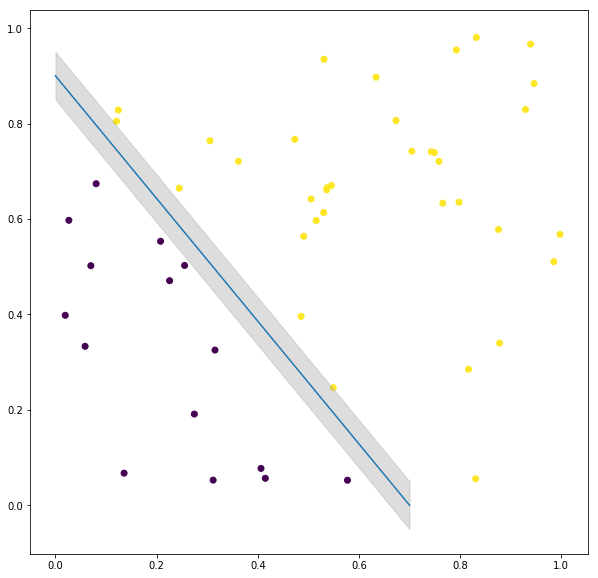

In [12]:
plt.figure(figsize=(10,10))
plt.scatter(df["bumpiness"],df["grade"],c=df["target"])
plt.plot([0,0.7],[0.9,0])
plt.fill_between([0,0.7],[0.95,0.05],[0.85,-0.05], edgecolor='none', color='#AAAAAA', alpha=0.4)
plt.show()

In [13]:
# Those points that are nearest to the line are called the SUPPORT VECTORS. 

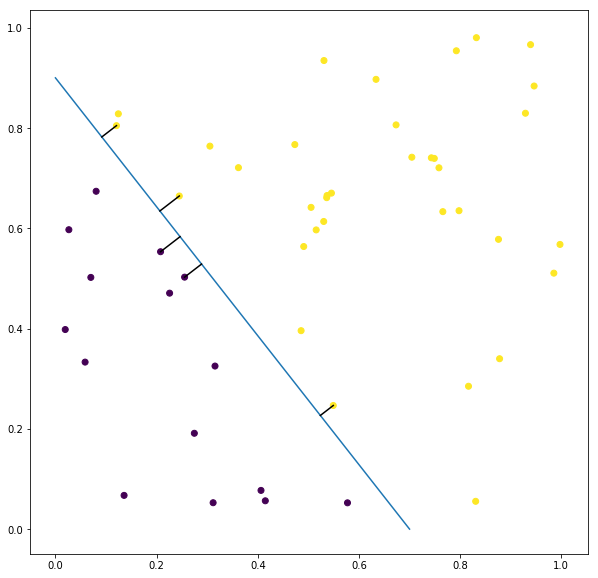

In [14]:
import math

x1=0.0
y1=0.9
x2=0.7
y2=0.0

plt.figure(figsize=(10,10))
plt.scatter(df["bumpiness"],df["grade"],c=df["target"])
plt.plot([0,0.7],[0.9,0])

d=[]

for x3,y3 in df[["bumpiness","grade"]].values:
    # first convert line to normalized unit vector
    dx = x2 - x1
    dy = y2 - y1
    mag = math.sqrt(dx*dx + dy*dy)
    dx /= mag
    dy /= mag

    #translate the point and get the dot product
    l = (dx * (x3 - x1)) + (dy * (y3 - y1))
    x4 = (dx * l) + x1
    y4 = (dy * l) + y1
    
    d.append([(x3-x4)**2+(y3-y4)**2,x3,y3])
    

d = sorted(d,key=lambda e: e[0])
d = list(map(lambda e: [e[1],e[2]],d))
d = d[:5]

for x3,y3 in d:
    # first convert line to normalized unit vector
    dx = x2 - x1
    dy = y2 - y1
    mag = math.sqrt(dx*dx + dy*dy)
    dx /= mag
    dy /= mag

    #translate the point and get the dot product
    l = (dx * (x3 - x1)) + (dy * (y3 - y1))
    x4 = (dx * l) + x1
    y4 = (dy * l) + y1
    

    plt.plot([x4,x3],[y4,y3],color="black" )
    
plt.show()

In [18]:
# Let's put the data in a compliant form and use the sklearn method and load the support vector
from sklearn.svm import SVC

clf = SVC(kernel="linear", C=100)

X = df[["bumpiness","grade"]].values
y = df["target"]

clf.fit(X,y)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

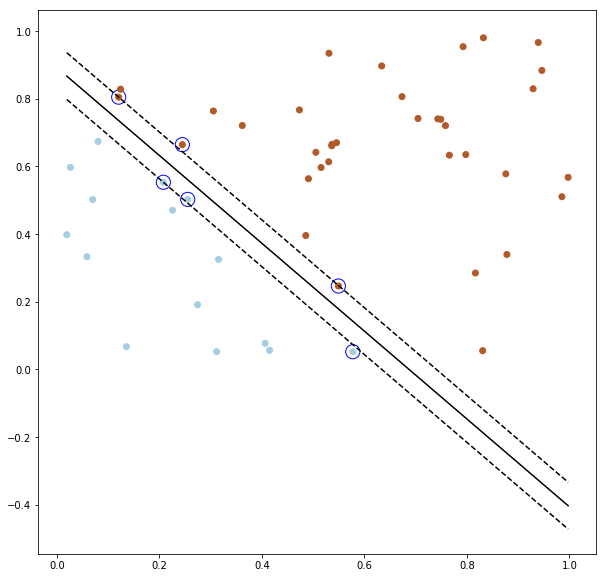

In [19]:
# From here: http://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html#sphx-glr-auto-examples-svm-plot-separating-hyperplane-py
import numpy as np
plt.figure(figsize=(10,10))
    
#plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
#plt.plot(clf.)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], color="none",edgecolor="blue",s=200)
# get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]))
yy = a * xx - (clf.intercept_[0]) / w[1]

# plot the parallels to the separating hyperplane that pass through the
# support vectors
b = clf.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = clf.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

# plot the line, the points, and the nearest vectors to the plane
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=80, facecolors='none')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

plt.show()

In [ ]:
# We have highlighted the support vectors, the hyperplane.

In [ ]:
# Now we can segment the space to find the output of the classifier

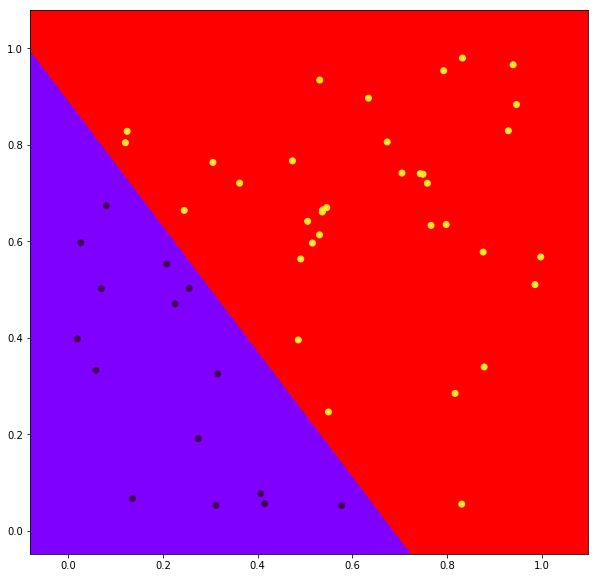

In [20]:
h = .001
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + .1
y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10,10))
plt.pcolormesh(xx, yy, Z,cmap="rainbow")
plt.scatter(X[:, 0], X[:, 1],c=y)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

In [ ]:
# Now this was just with a subset. Let's put all the points.

In [21]:
df = pd.read_csv("../data/terrain.csv")

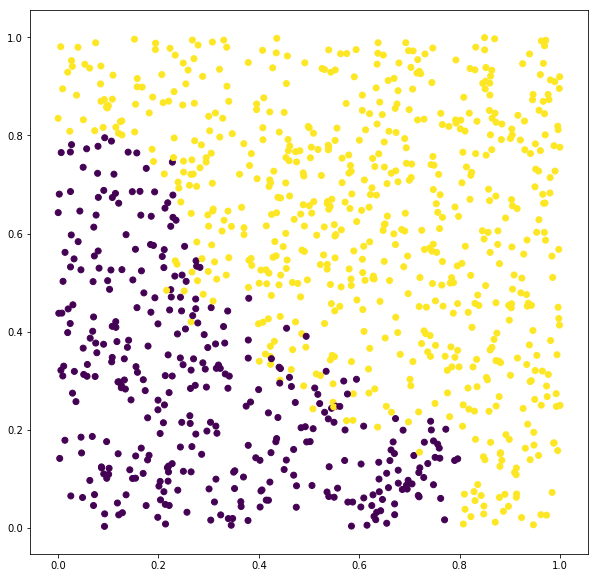

In [22]:
plt.figure(figsize=(10,10))
plt.scatter(df["bumpiness"],df["grade"],c=df["target"])
plt.show()

In [23]:
from sklearn.svm import SVC

clf = SVC(kernel="linear", C=100)

X = df[["bumpiness","grade"]].values
y = df["target"]

clf.fit(X,y)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

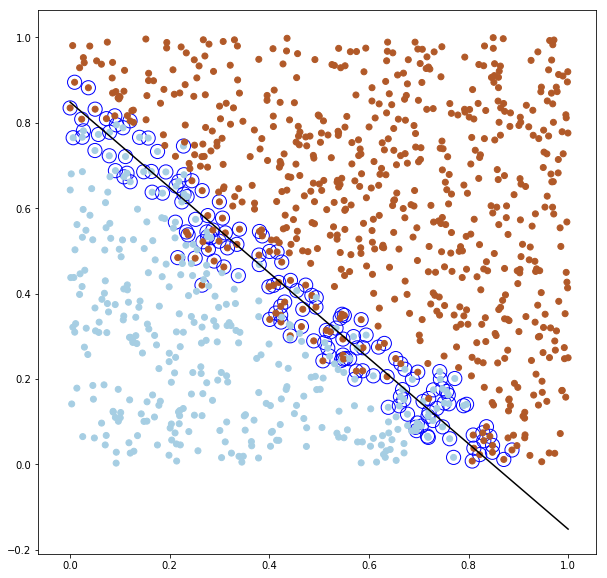

In [24]:
# From here: http://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html#sphx-glr-auto-examples-svm-plot-separating-hyperplane-py
import numpy as np
plt.figure(figsize=(10,10))
    
#plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
#plt.plot(clf.)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], color="none",edgecolor="blue",s=200)
# get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]))
yy = a * xx - (clf.intercept_[0]) / w[1]

# plot the line, the points, and the nearest vectors to the plane
plt.plot(xx, yy, 'k-')


plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=80, facecolors='none')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

plt.show()

In [ ]:
# We see that the margin is now soft and more support vectors are now used.

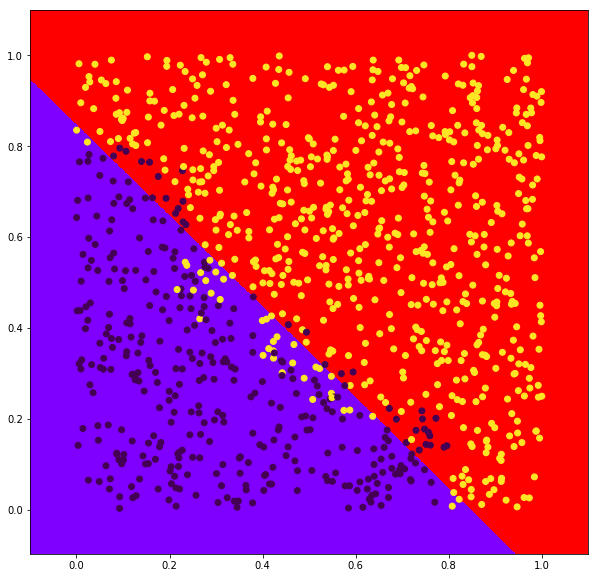

In [25]:
h = .001
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + .1
y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10,10))
plt.pcolormesh(xx, yy, Z,cmap="rainbow")
plt.scatter(X[:, 0], X[:, 1],c=y)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

In [27]:
# Accuracy
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=42)

In [29]:
clf.fit(X_train,y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
accuracy_score(y_test,clf.predict(X_test))

0.91212121212121211

In [ ]:
# Let's take a pause and look to a more complicated theoretical case:

In [3]:
df = pd.read_csv("./data/points.csv")

In [4]:
df.head()

,Unnamed: 0,X,Y,target
0,0,0.043087,0.027075,1
1,1,0.749877,0.700227,0
2,2,0.156441,0.027962,1
3,3,-0.002856,-1.281482,0
4,4,0.275422,-0.084037,1


In [5]:
from sklearn.svm import SVC

clf = SVC(kernel="linear", C=100)

X = df[["X","Y"]].values
y = df["target"]

clf.fit(X,y)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

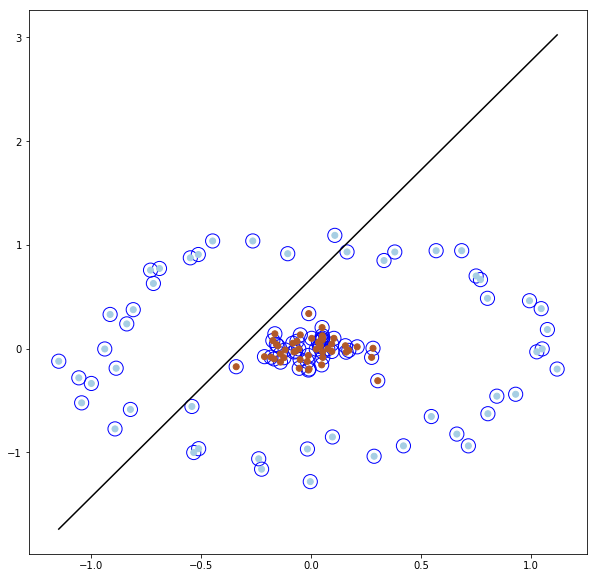

In [6]:
# From here: http://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html#sphx-glr-auto-examples-svm-plot-separating-hyperplane-py
import numpy as np
plt.figure(figsize=(10,10))
    
#plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
#plt.plot(clf.)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], color="none",edgecolor="blue",s=200)
# get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]))
yy = a * xx - (clf.intercept_[0]) / w[1]

# plot the line, the points, and the nearest vectors to the plane
plt.plot(xx, yy, 'k-')


plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=80, facecolors='none')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

plt.show()

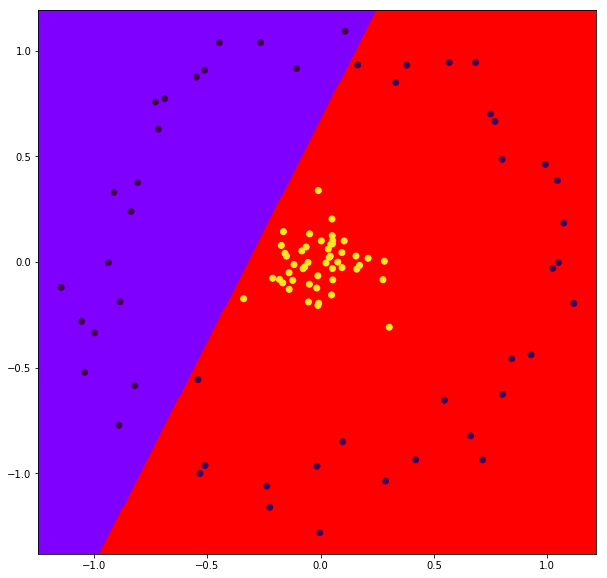

In [7]:
h = .001
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + .1
y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10,10))
plt.pcolormesh(xx, yy, Z,cmap="rainbow")
plt.scatter(X[:, 0], X[:, 1],c=y)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

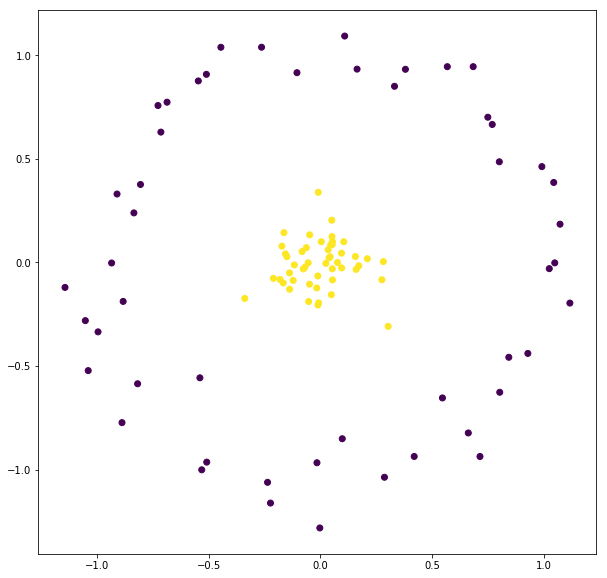

In [16]:
plt.figure(figsize=(10,10))
plt.scatter(df["X"],df["Y"],c=df["target"])
plt.show()

In [ ]:
# There's no line separating both spaces. So we can use a trick to still use a plane to separate. 
# Let's add a feature

In [17]:
df["Z"]=df["X"]**2+df["Y"]**2

In [18]:
X = df[["X","Y","Z"]].values
y = df["target"]

In [19]:
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
py.iplot([go.Scatter3d(x=X[:, 0], y=X[:, 1], z=X[:, 2],mode="markers",marker={"color":y})])

In [20]:
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
py.iplot([go.Scatter3d(x=X[:, 0], y=X[:, 1], z=X[:, 2],mode="markers",marker={"color":y})])

In [ ]:
"""from mpl_toolkits import mplot3d
plt.figure(figsize=(10,10))
ax = plt.subplot(projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], X[:, 2],c=y)
ax.view_init(elev=30, azim=180)
plt.show()"""

In [22]:
df = pd.read_csv("./data/terrain.csv")
X=df[["bumpiness","grade"]].values
y=df["target"]

In [35]:
clf_good = SVC(kernel="poly",C=100)

In [36]:
from sklearn.model_selection import cross_val_score

In [37]:
cross_val_score(clf_good,X,y,cv=10)

array([ 0.91089109,  0.93069307,  0.91089109,  0.93      ,  0.94      ,
        0.98      ,  0.95      ,  0.90909091,  0.92929293,  0.91919192])

In [38]:
clf_good.fit(X,y)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

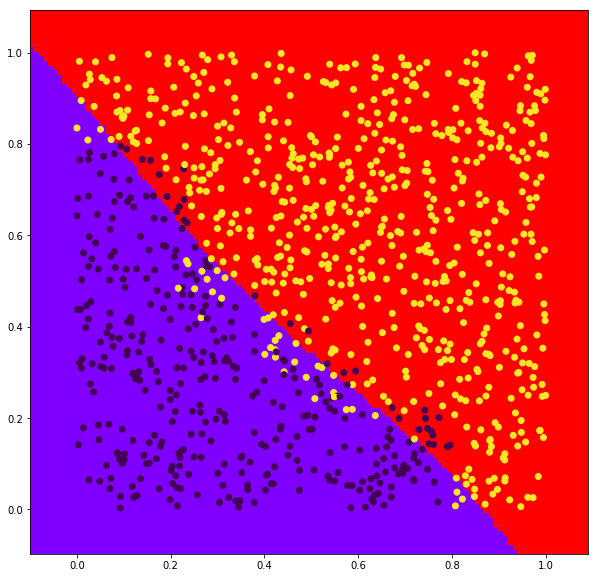

In [39]:
h = .01
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + .1
y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf_good.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10,10))
plt.pcolormesh(xx, yy, Z,cmap="rainbow")
plt.scatter(X[:, 0], X[:, 1],c=y)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

In [49]:
#Con kernel circular. Gamma es el radio de ajuste. 
from ipywidgets import interact
@interact(gamma=range(1,30))
def show(gamma):
    clf=SVC(kernel="rbf",C=100,gamma=10*gamma)
    clf.fit(X,y)
    h = .01
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(10,10))
    plt.pcolormesh(xx, yy, Z,cmap="rainbow")
    plt.scatter(X[:, 0], X[:, 1],c=y)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.show()

A Jupyter Widget

In [58]:
#Con kernel polinómico. En lugar de gamma hay que poner degree. DEgree es el grado polinómico.
@interact(degree=range(1,20))
def show(degree):
    clf=SVC(kernel="poly",C=50,degree=degree)
    clf.fit(X,y)
    h = .01
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(10,10))
    plt.pcolormesh(xx, yy, Z,cmap="rainbow")
    plt.scatter(X[:, 0], X[:, 1],c=y)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.show()

A Jupyter Widget

In [28]:
from sklearn.model_selection import GridSearchCV

In [59]:
clf2 = GridSearchCV(SVC(),param_grid={"kernel":["poly"],
                                   "degree":[1,20]},
                    scoring="precision")

In [60]:
clf2.fit(X,y)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'kernel': ['poly'], 'degree': [1, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='precision', verbose=0)

In [61]:
clf2.best_params_

{'degree': 1, 'kernel': 'poly'}

In [62]:
nclf=SVC(**clf_good.best_params_)
nclf

AttributeError: 'SVC' object has no attribute 'best_params_'

In [44]:
h = .001
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + .1
y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = nclf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10,10))
plt.pcolormesh(xx, yy, Z,cmap="rainbow")
plt.scatter(X[:, 0], X[:, 1],c=y)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

NotFittedError: This SVC instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [65]:
from sklearn.metrics import confusion_matrix

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [69]:
confusion_matrix(clf_good.predict(X_test),y_test)

array([[103,  14],
       [ 13, 200]], dtype=int64)

In [71]:
import seaborn as sns

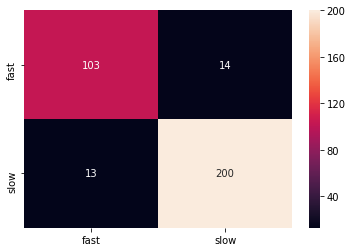

In [72]:
df_cm = pd.DataFrame(
        confusion_matrix(clf_good.predict(X_test),y_test), index=["fast","slow"], columns=["fast","slow"], 
    )
fig = plt.figure()
sns.heatmap(df_cm, annot=True, fmt="d")

![alt text](https://upload.wikimedia.org/wikipedia/commons/2/26/Precisionrecall.svg "Logo Title Text 1")



In [76]:
from sklearn.metrics import classification_report

In [77]:
print(classification_report(clf_good.predict(X_test),y_test))

             precision    recall  f1-score   support

        0.0       0.89      0.88      0.88       117
        1.0       0.93      0.94      0.94       213

avg / total       0.92      0.92      0.92       330



In [63]:
cross_val_score(clf,X,y,cv=10,scoring="recall")

array([ 0.93846154,  0.92307692,  0.92307692,  0.90769231,  0.95384615,
        0.98461538,  0.96923077,  0.9375    ,  0.953125  ,  0.90625   ])

In [64]:
from sklearn.model_selection import GridSearchCV

In [66]:

clf=GridSearchCV(estimator=SVC(kernel="poly"),param_grid={"degree":range(1,10)},scoring="precision")